In [15]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Nishant\IIT G\Video Assignments\PCA Analysis\PCA_practice_dataset.csv")
data.head()
data.shape

(8041, 35)

In [16]:
rng = RandomState()

train = data.sample(frac=0.8, random_state=rng)
test = data.loc[~data.index.isin(train.index)]
train.shape

(6433, 35)

In [18]:
test.shape

(1608, 35)

In [19]:
tr=train.T
cov = np.cov(tr)
print(cov)
print(tr.shape)
eig_val,eig_vec = np.linalg.eig(cov)

[[0.19648037 0.17545301 0.01414027 ... 0.1654946  0.16020467 0.00471007]
 [0.17545301 0.21172994 0.03138819 ... 0.15011748 0.19582332 0.0200642 ]
 [0.01414027 0.03138819 0.170851   ... 0.00823564 0.02624379 0.1188016 ]
 ...
 [0.1654946  0.15011748 0.00823564 ... 0.19250627 0.18548957 0.01059183]
 [0.16020467 0.19582332 0.02624379 ... 0.18548957 0.24174842 0.02685526]
 [0.00471007 0.0200642  0.1188016  ... 0.01059183 0.02685526 0.13265249]]
(35, 6433)


In [20]:
cov.shape

(35, 35)

Number of components is 3
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563]
Number of components is 3
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563]
Number of components is 4
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563, 0.1301863206778589]
Number of components is 4
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563, 0.1301863206778589]
Number of components is 5
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563, 0.1301863206778589, 0.09502191467661816]
Number of components is 5
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563, 0.1301863206778589, 0.09502191467661816]
Number of components is 6
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563, 0.1301863206778589, 0.09502191467661816, 0.08033217536402346]
Number of components is 7
[3.4812306124345507, 1.9687227335531265, 0.24637753173187563, 0.1301863206778589, 0.09502191467661816, 0.08033217536402346, 0.056185420735871607]


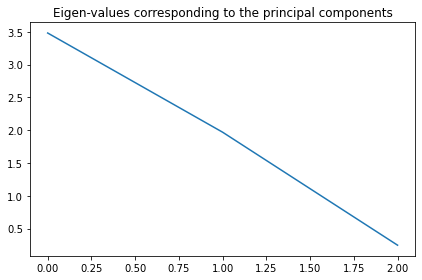

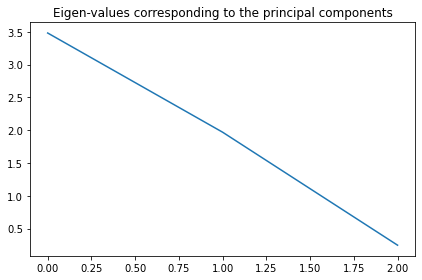

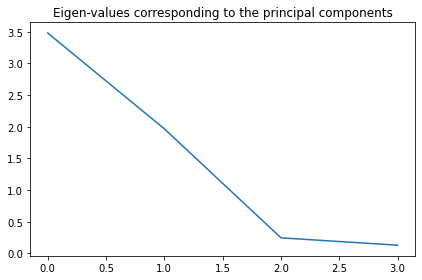

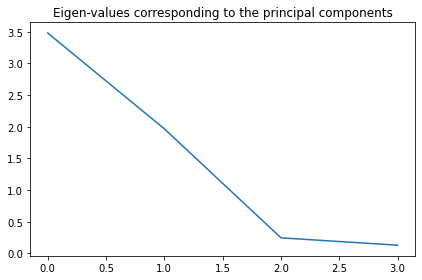

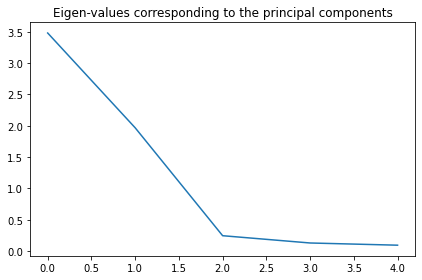

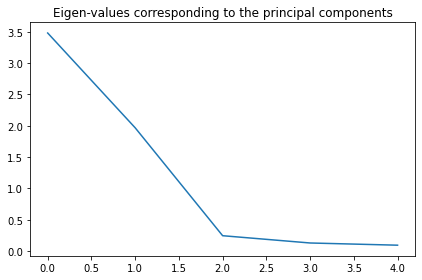

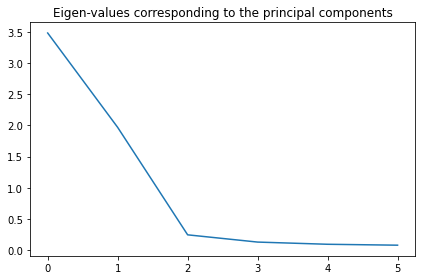

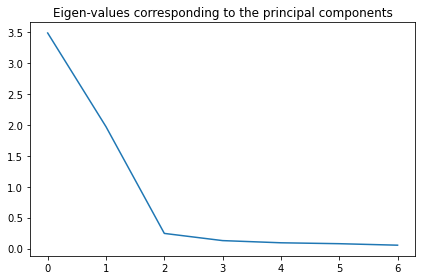

In [21]:
sort_idx = np.argsort(eig_val) 
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []

principal_eig_val = []
j=0
for i in range(0,8):
    while(temp_sum<(0.9+0.01*i)*eig_val_sum):
        principal_eig_vec.append(eig_vec[sort_idx[j]])
        principal_eig_val.append(eig_val[sort_idx[j]])
        temp_sum += eig_val[sort_idx[j]]
        j += 1
    print("Number of components is {}".format(j))
    print(principal_eig_val)
    fig, ax = plt.subplots()
    ax.plot(principal_eig_val)
    ax.set_title("Eigen-values corresponding to the principal components")
    plt.tight_layout()